## Titanic Dataset

The dataset containing  information about passengers on the Titanic, including features such as age, sex, ticket class, number of siblings/spouses aboard, number of parents/children aboard, fare, and more, the task is to build a predictive model that can accurately classify whether a passenger survived (1) or did not survive (0) 

Below is a brief information about each columns of the dataset:

1. **PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **Sex:** Passenger's sex. It's either Male or Female.

6. **Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **SibSp:** Number of siblings or spouses travelling with each passenger.
8. **Parch:** Number of parents of children travelling with each passenger.
9. **Ticket:** Ticket number.
10. **Fare:** How much money the passenger has paid for the travel journey.
11. **Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked:** Port from where the particular passenger was embarked/boarded.

### Step 1:- Importing Necessary Libraries

In [1]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
#we can write like this also->>>     from sklearn.matrics import confusion_matrix,classification_report,roc_curve, auc, roc_auc_score

### Step 2:- Loading Dataset

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Explore the Dataset for better understanding 

In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*describe(include = ['O'])* will show the descriptive statistics of object data types.

In [9]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


This shows that there are duplicate *Ticket number* and *Cabins* shared, this information got by seeing freq row. The highest number of duplicate ticket number is "347082". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "B96 B98".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

We can justify by using count, unique,top,freq

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

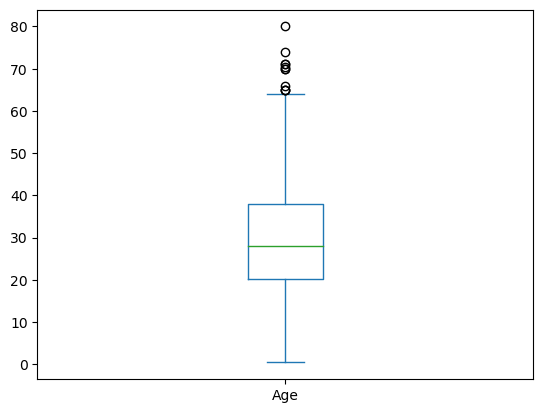

In [11]:
train.Age.plot(kind='box')

<Axes: xlabel='Age', ylabel='Density'>

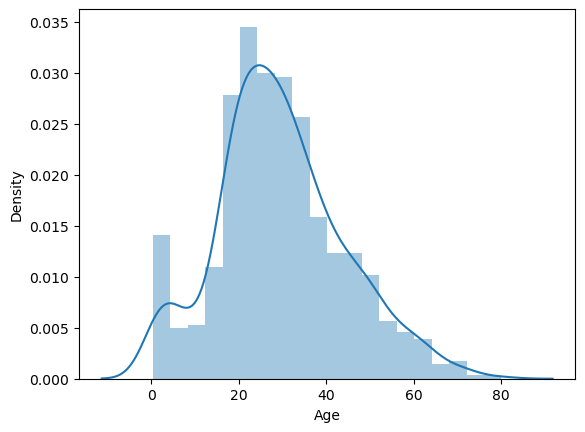

In [12]:
sns.distplot(train.Age)

In [13]:
df5=train.copy(deep=True)

In [14]:
df5['Age']=df5.Age.fillna(round(df5.Age.mean(),0))

In [15]:
df5.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

similarly, Embarked value are also missing in some rows.
889 rows out of 891 rows 

In [16]:
null_vals = train.isnull().sum()
null_vals[null_vals>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [17]:
train.Fare.max()

512.3292

In [18]:
train.Fare.mean()

32.204207968574636

In [19]:
train.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [20]:
train.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### Now will check for test dataset

In [21]:
test.shape

(418, 11)

*Survived* column is not present in Test data.
We have to train our classifier using the Train data and generate predictions (*Survived*) on Test data.

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing entries for *Age* in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have *Age* value.

*Cabin* values are also missing in many rows. Only 91 rows out ot 418 have values for *Cabin* column.

In [23]:
test_miss_vals = test.isnull().sum()
test_miss_vals[test_miss_vals>0]

Age       86
Fare       1
Cabin    327
dtype: int64

There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* information.

### check for duplicates 

In [24]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
test[test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There is no duplicated records in training and testing set

## Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [26]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
train.Survived.value_counts(normalize=True)*100  #checking the distribution

0    61.616162
1    38.383838
Name: Survived, dtype: float64

The data set has slightly imbalanced but its fine we can use it.
1. Balanced Dataset :- Each class has same propotion of distribution 50-50           
2. Slightly Imbalanced Dataset:- class distribution is roughly 60-40, 70-30, or even 80-20, depending on the problem.                 
3. Imbalanced Dataset:- When the class distribution is highly skewed, such as 90-10, 95-5, or even more extreme imbalances.          


<Axes: xlabel='Survived', ylabel='count'>

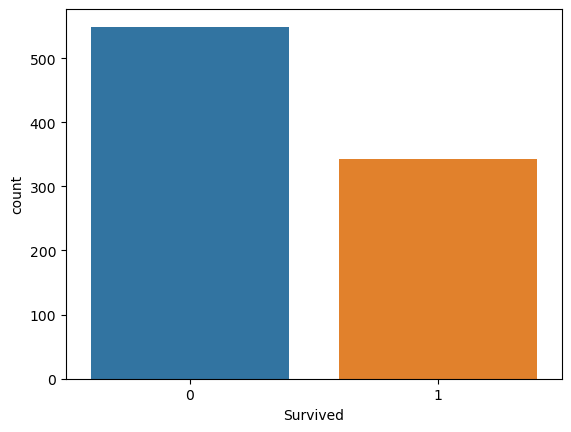

In [28]:
sns.countplot(x = train.Survived)

### Pclass vs. Survival

Higher class passengers have better survival chance.

In [29]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [31]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [32]:
train.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [33]:
train.groupby('Pclass')[['Survived','Fare']].mean()*100

,Survived,Fare
Pclass,,
1,62.962963,8415.468750
2,47.282609,2066.218315
3,24.236253,1367.555010


In [34]:
train.groupby('Pclass')[['Survived','Fare']].mean()

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


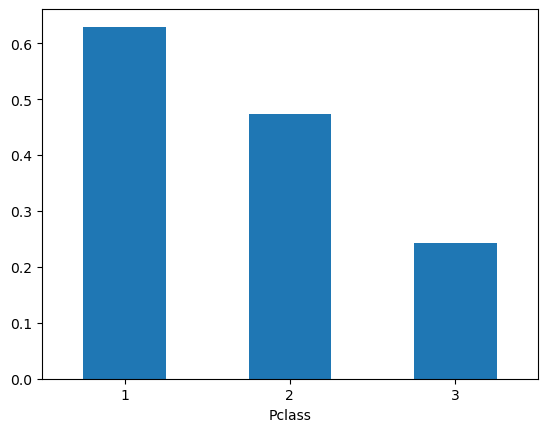

In [35]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# Sex vs Survival
Females has better survival chance.

In [36]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [38]:
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [39]:
train.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

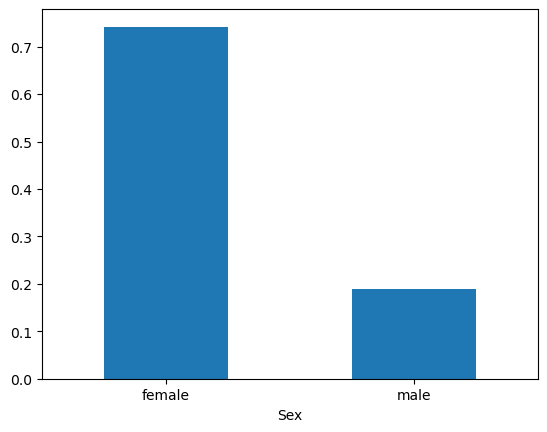

In [40]:
train.groupby('Sex').Survived.mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

#### Now will perform multi-variate analysis using Pclass & Sex vs Survival

### Pclass & Sex vs Survival

Below, we just find out how many males and females are there in each *Pclass*. We then plot a stacked bar diagram with that information. We found that there are more males among the 3rd Pclass passengers.

In [41]:
tab = pd.crosstab(train['Pclass'],train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [42]:
tab.sum(0)  #Sum Column Wise

Sex
female    314
male      577
dtype: int64

In [43]:
tab.sum(1)    #Sum Row Wise

Pclass
1    216
2    184
3    491
dtype: int64

In [44]:
tab.div(tab.sum(1).astype(float),axis=0)

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


In [45]:
pd.crosstab(index = [train.Survived,train.Pclass], columns = [train.Sex])

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

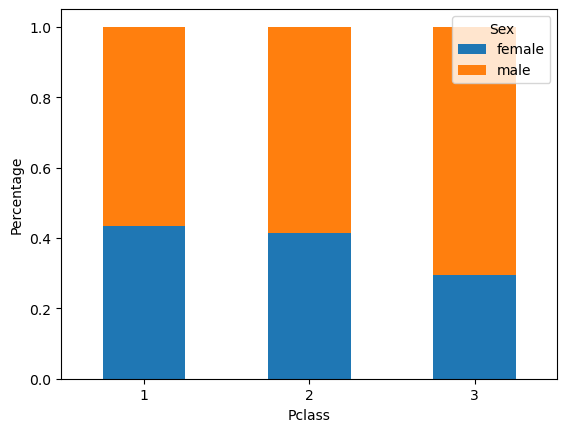

In [46]:
tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

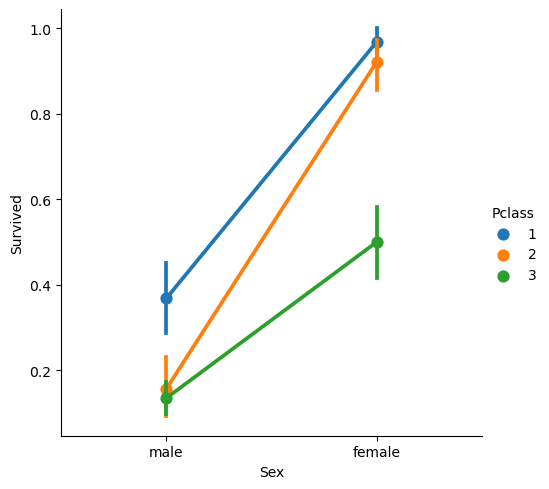

In [47]:
sns.catplot(x = 'Sex',y = 'Survived',hue='Pclass',kind = 'point',data=train)

In [48]:
train.groupby(['Sex','Survived','Pclass'])['Age'].mean()

Sex     Survived  Pclass
female  0         1         25.666667
                  2         36.000000
                  3         23.818182
        1         1         34.939024
                  2         28.080882
                  3         19.329787
male    0         1         44.581967
                  2         33.369048
                  3         27.255814
        1         1         36.248000
                  2         16.022000
                  3         22.274211
Name: Age, dtype: float64

From the above plot, it can be seen that:
- Women from 1st and 2nd Pclass have almost 100% survival chance. 
- Men from 2nd and 3rd Pclass have only around 10% survival chance.

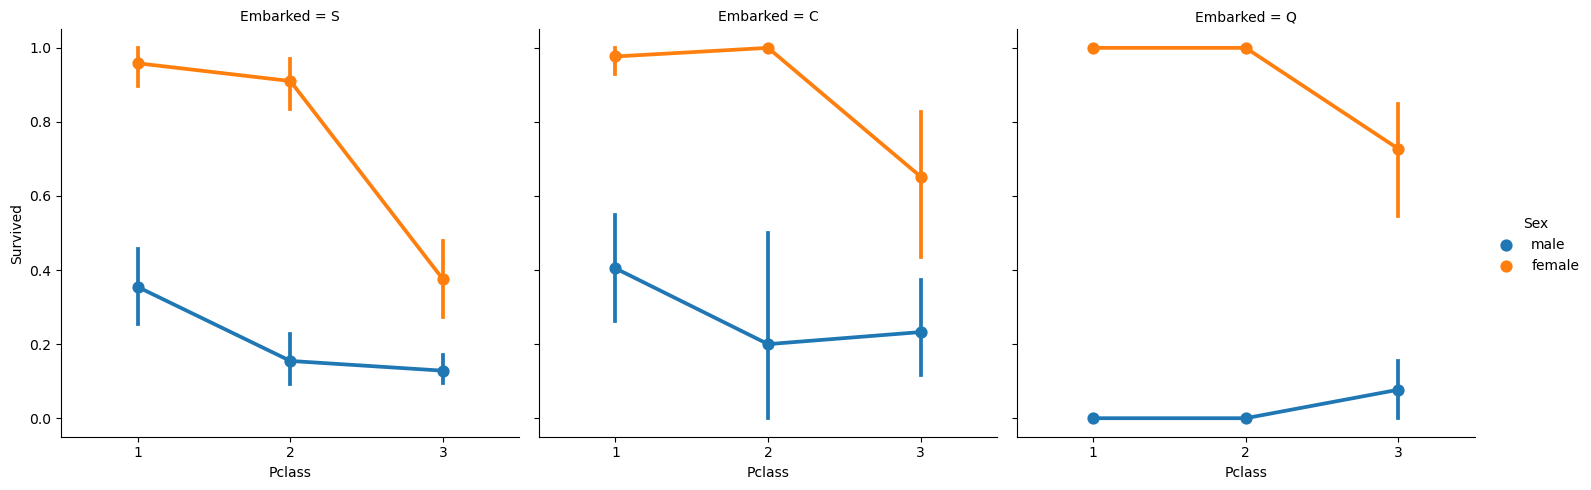

In [49]:
sns.catplot(x = 'Pclass',y = 'Survived',hue='Sex',col = 'Embarked',kind = 'point',data=train)

From the above plot, it can be seen that:
- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

In [50]:
train[(train['Pclass']==2)&(train['Embarked']=='C')&(train['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


### Embarked vs Survived

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [53]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


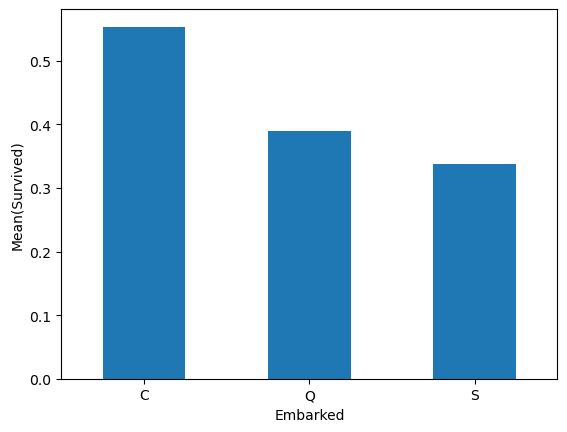

In [54]:
train.groupby('Embarked').Survived.mean().plot(kind='bar')
plt.ylabel('Mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### Parch vs. Survival

In [55]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [56]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [57]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


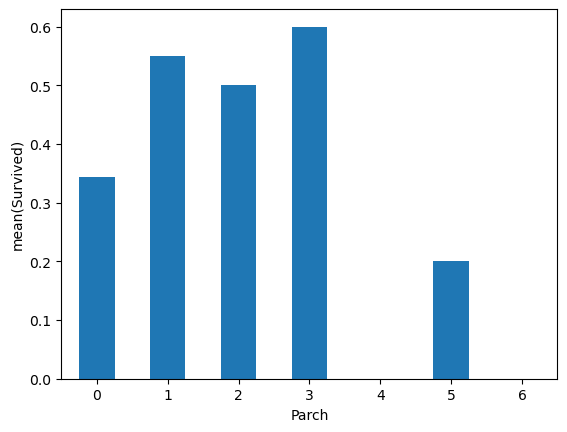

In [58]:
train.groupby('Parch').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### SibSp vs. Survival

In [59]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [60]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [61]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


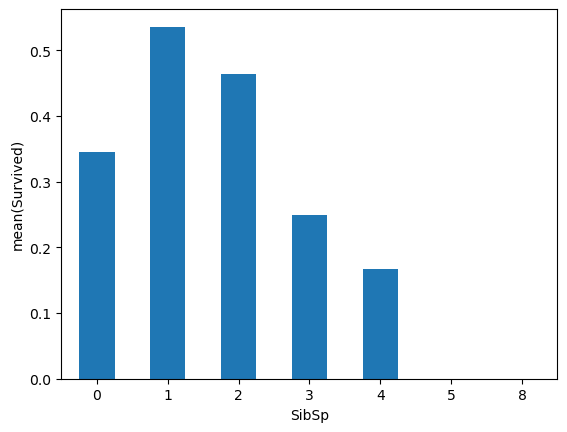

In [62]:
train.groupby('SibSp').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

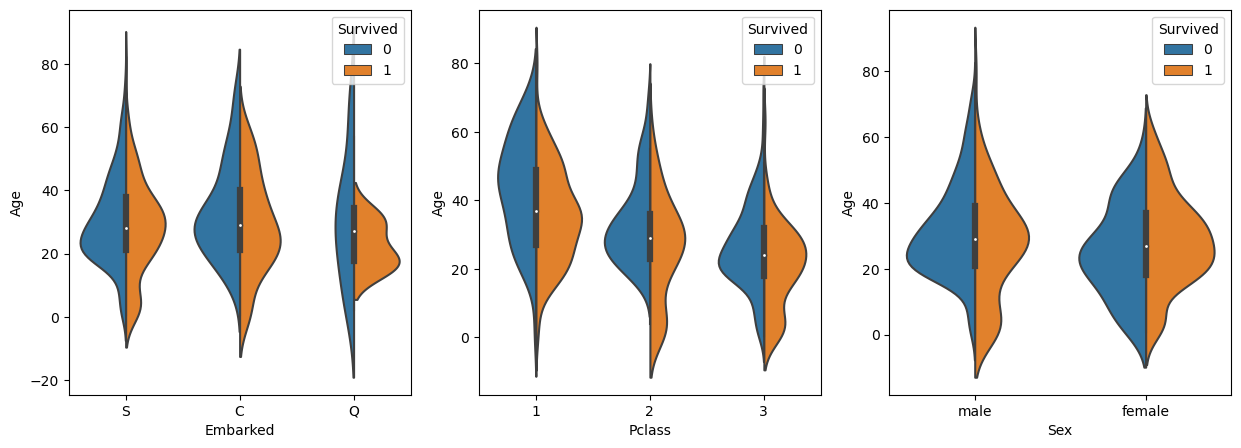

In [63]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

In [64]:
train[(train["Age"]>=60) & (train["Age"]<=80)].count()

PassengerId    26
Survived       26
Pclass         26
Name           26
Sex            26
Age            26
SibSp          26
Parch          26
Ticket         26
Fare           26
Cabin          13
Embarked       25
dtype: int64

In [65]:
pd.cut(train.Age,4)

0      (20.315, 40.21]
1      (20.315, 40.21]
2      (20.315, 40.21]
3      (20.315, 40.21]
4      (20.315, 40.21]
            ...       
886    (20.315, 40.21]
887     (0.34, 20.315]
888                NaN
889    (20.315, 40.21]
890    (20.315, 40.21]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [66]:
Q1=train.Age.quantile(0.25)
Q2=train.Age.quantile(0.50)
Q3=train.Age.quantile(0.75)
IQR=Q3-Q1

print("First Quratile:",Q1)
print("Second Quartile:",Q2)
print("Third Quartile:",Q3)
print("Inter Quartile Range:",IQR)

First Quratile: 20.125
Second Quartile: 28.0
Third Quartile: 38.0
Inter Quartile Range: 17.875


In [67]:
HE=Q3+1.5*IQR
print("HIGHER END POINT:",HE)

LE=Q1-1.5*IQR
print("LOWER END POINT:",LE)

HIGHER END POINT: 64.8125
LOWER END POINT: -6.6875


<Axes: >

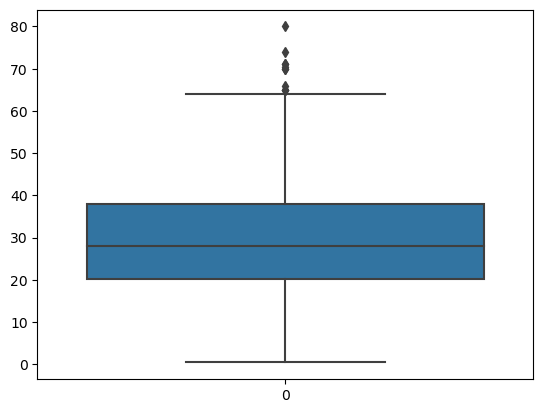

In [68]:
sns.boxplot(train.Age)

From *Pclass* violinplot, we can see that:
- 1st Pclass has very few children as compared to other two classes.
- 1st Plcass has more old people as compared to other two classes.
- Almost all children (between age 0 to 10) of 2nd Pclass survived.
- Most children of 3rd Pclass survived.
- Younger people of 1st Pclass survived as compared to its older people.

From *Sex* violinplot, we can see that:
- Most male children (between age 0 to 14) survived.
- Females with age between 18 to 40 have better survival chance.

From *Embarked* Violinplot, we can see that:
- Almost all the Passengers from Embarked Q (Age greater than 40) has low survival rate

### Correlating Features

In [69]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: >

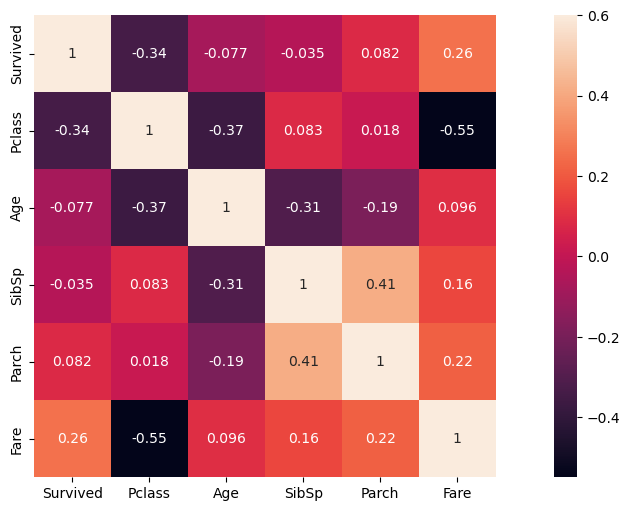

In [70]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1).corr(),vmax=0.6,square=True,annot=True)

In [71]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [72]:
train_dup = train.copy()

In [73]:
test_dup = test.copy()

### Droping Irrelevent columns

In [74]:
train.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [75]:
test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [76]:
null_counts = train.isnull().sum()
null_counts[null_counts>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [77]:
687/891

0.7710437710437711

#### Cabin has more than 75% of null values, In the dataset if we have more than 75% of null values it doesn't provide significant information for prediction so its better to drop those features

In [78]:
train.drop('Cabin',axis =1,inplace=True)

In [79]:
test.drop('Cabin',axis =1,inplace=True)

### Imputing the null values present in the Age and Embarked column

<Axes: ylabel='Frequency'>

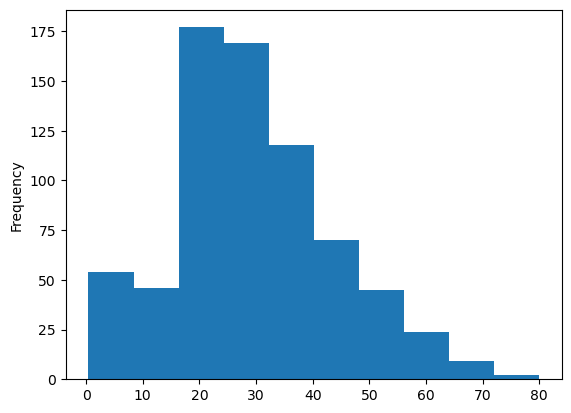

In [80]:
train.Age.plot(kind = 'hist')

### we can see that the age is normaly distributed, so we can go with mean imputation

In [81]:
train['Age'] = train.Age.fillna(round(train.Age.mean(),0))

In [82]:
print(train.Age.min(),train.Age.max())

0.42 80.0


### SibSp & Parch Feature

Combining *SibSp* & *Parch* feature, we create a new feature named *FamilySize*.

In [83]:
train['FamilySize'] = train['SibSp']+train.Parch + 1

In [84]:
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

### Now will perform some encoding technique

In [85]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2


In [86]:
cols = pd.get_dummies(train[['Sex','Embarked']],drop_first = True).astype('int')

In [87]:
final_train = pd.concat([train,cols],axis=1)

In [88]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [89]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [90]:
colstest = pd.get_dummies(test[['Sex','Embarked']],drop_first = True).astype('int')

In [91]:
final_test = pd.concat([test,colstest],axis=1)

In [92]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


### Now will keep only required feature for building the model

In [93]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [94]:
X = final_train.drop(['Name','Sex','Embarked','FamilySize','Survived'],axis=1)

In [95]:
y = final_train['Survived']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [97]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [98]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [99]:
# Predicting for training and testing 
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [100]:
# Model Evaluation

train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')# below 

Training Score 0.81, Testing Score 0.77


In [101]:
y_train.shape

(623,)

In [102]:
(345+160)/623  #for train set accuracy 

0.8105939004815409

In [103]:
confusion_matrix(y_train,ytrain_pred)

array([[345,  51],
       [ 67, 160]], dtype=int64)

In [104]:
confusion_matrix(y_test,ytest_pred)

array([[128,  25],
       [ 37,  78]], dtype=int64)

In [105]:
(128+78)

206

In [106]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       396
           1       0.76      0.70      0.73       227

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.81      0.81      0.81       623



In [107]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [108]:
fpr,tpr,thresholds = roc_curve(y_train,ytrain_pred)  # Calculate ROC curve(Reciever operating curve)

In [109]:
roc_auc = auc(fpr,tpr)      # Calculate AUC(Area under curve)  

In [110]:
print("AUC = ",roc_auc)

AUC =  0.7880289680950475


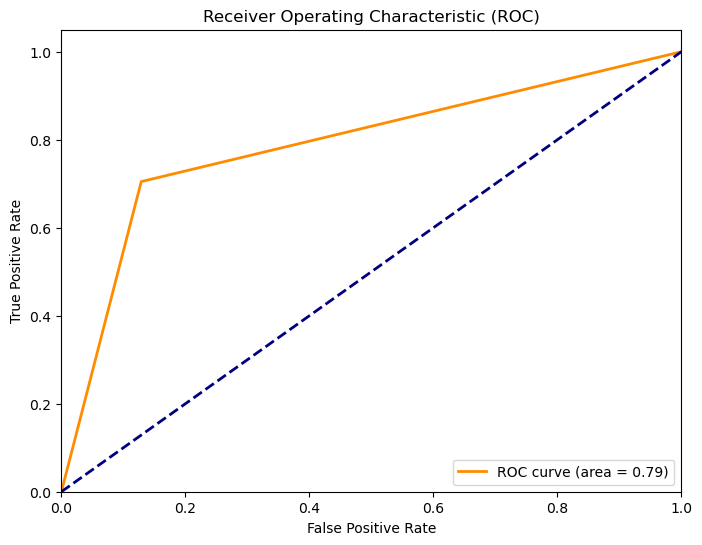

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

------------------------------ checking for test dataset --------------------------------------------

In [112]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
114,3,17.0,0,0,14.4583,0,0,0
874,2,28.0,1,0,24.0000,0,0,0


In [113]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


In [114]:
final_test1 = final_test.drop(['Name','Sex','Embarked'],axis=1)

### we want to treat the null values present in the test set

In [115]:
final_test1.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

<Axes: ylabel='Frequency'>

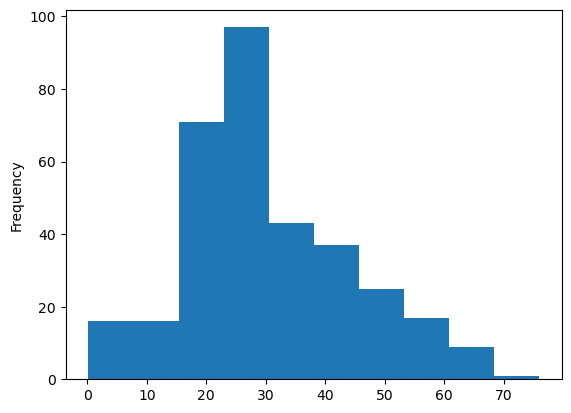

In [116]:
final_test1.Age.plot(kind = 'hist')

In [117]:
round(final_test1.Age.mean(),0)

30.0

In [118]:
final_test1['Age'] = final_test1.Age.fillna(round(final_test1.Age.mean(),0))

In [119]:
final_test1.shape

(418, 8)

In [120]:
final_test1.Fare.median()

14.4542

In [121]:
final_test1['Fare'] = final_test1.Fare.fillna(final_test1.Fare.median())

In [122]:
clf.predict(final_test1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,